In [2]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib
from pandas import json_normalize

In [3]:
# Importing TMDB Df_all Pickle 
df_all = pd.read_pickle("df_all2.pkl")

In [5]:
# Creating df_all slice
df_clean = df_all[["director_name","director_gender","director_id", "director_popularity", "movie_release_date","movie_vote_average","movie_vote_count","movie_original_language","movie_title","movie_id","director_known_for_department"]]
df_clean.head(4)

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department
0,Dodo Abashidze,2,560142,0.728,1985-12-01,7.1,14.0,ka,The Legend of Suram Fortress,103590.0,Acting
1,Dodo Abashidze,2,560142,0.728,1968-12-22,5.8,12.0,ka,Don't Grieve!,27922.0,Acting
2,Dodo Abashidze,2,560142,0.728,1969-12-28,6.1,11.0,ka,Pirosmani,88302.0,Acting
3,George Abbott,2,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing


In [7]:
# Checking Value Counts for names

df_clean["director_name"].value_counts()

James Young            31
Colin Campbell         26
John Gilbert           25
John Hughes            23
Michael Moore          23
                       ..
David Walling           1
Paula Verhoeven         1
William Howard Taft     1
Sam B. Wood             1
Prince Charming         1
Name: director_name, Length: 3103, dtype: int64

In [8]:
# Removing non writers, directors

#1. Check value counts for known fors:

df_clean["director_known_for_department"].value_counts()

Directing            4638
Acting               2540
Writing               845
Production            430
Sound                 184
Camera                143
Editing               105
Art                    95
Crew                   90
Visual Effects         51
Costume & Make-Up      50
Lighting               21
Creator                11
Name: director_known_for_department, dtype: int64

In [20]:
# Keep in new df: ["Directing", "Writing", "Production"]

df_clean_dir = df_clean[df_clean["director_known_for_department"].isin(["Directing","Writing","Production"])]
df_clean_dir



,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department
3,George Abbott,2,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing
4,George Abbott,2,2004,0.6,1958-07-23,6.9,17.0,en,Damn Yankees!,41253.0,Directing
5,George Abbott,2,2004,0.6,1931-11-28,6.3,9.0,en,The Cheat,156324.0,Directing
6,George Abbott Clark,0,1811971,0.6,2017-05-02,4.9,84.0,en,The Shadow Effect,383538.0,Writing
7,Jim Abrahams,2,12936,1.456,1980-07-02,7.3,2453.0,en,Airplane!,813.0,Writing
...,...,...,...,...,...,...,...,...,...,...,...
9198,Andrzej Żuławski,2,32082,0.6,1988-10-09,8.3,46.0,pl,On the Silver Globe,27072.0,Writing
9199,Andrzej Żuławski,2,32082,0.6,1975-02-12,7.5,43.0,fr,That Most Important Thing: Love,3476.0,Writing
9200,Xawery Żuławski,2,1138544,0.6,2009-04-21,5.7,30.0,pl,Snow White and Russian Red,36415.0,Directing
9201,Xawery Żuławski,2,1138544,0.6,NaN,8.0,7.0,pl,NaN,37337.0,Directing


In [18]:
# Checking again name value counts
df_clean_dir["director_name"].value_counts()

Frank Miller         12
David Howard         12
John Rice             9
John Hughes           9
Paul McGuigan         9
                     ..
Randall Kirk          1
Andre van Heerden     1
John Landis           1
Michael J. Mann       1
Randal Kirk II        1
Name: director_name, Length: 2047, dtype: int64

In [21]:
# Removing duplicates

df_clean_dir_dupes = df_clean_dir.drop_duplicates(["director_id", "movie_id"], ignore_index=True)
df_clean_dir_dupes["director_name"].value_counts()

David Howard           12
Frank Miller           12
John Hughes             9
Paul McGuigan           9
John Rice               9
                       ..
David W. Siegel         1
Harry Joe Brown Jr.     1
Yang Li                 1
David Wallach           1
Robert Wiener           1
Name: director_name, Length: 2047, dtype: int64

In [23]:
# Check David Howard
df_clean_dir_dupes.loc[df_clean_dir_dupes["director_name"].str.contains("David Howard")]

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department
2328,David Howard,2,15003,0.6,1999-12-23,7.0,1275.0,en,Galaxy Quest,926.0,Writing
2329,David Howard,2,15003,0.6,2007-11-07,6.1,37.0,en,The Three Investigators and The Secret Of Skel...,4407.0,Writing
2330,David Howard,2,15003,0.6,1995-09-30,6.9,13.0,de,After Five In The Forest Primeval,4285.0,Writing
2331,David Howard,0,1138030,0.6,2008-10-03,5.0,3.0,en,Flick,26772.0,Directing
2332,David Howard,0,1138030,0.6,2016-06-12,6.0,1.0,en,Interview With A Murderer,402267.0,Directing
2333,David Howard,0,1138030,0.6,1932-12-30,0.0,0.0,en,Robbers' Roost,523280.0,Directing
2334,David Howard,0,2247270,0.6,1933-01-01,0.0,0.0,en,Smoke Lightning,434729.0,Directing
2335,David Howard,0,1118819,0.6,2012-11-23,6.2,5.0,es,Hidden Moon,143311.0,Writing
2336,David Howard,0,1118819,0.6,2000-04-16,5.0,3.0,en,The Hustle,166641.0,Writing
2337,David Howard,0,1030519,0.6,1936-10-16,4.2,6.0,en,Daniel Boone,102379.0,Directing


In [32]:
# There are multiple David Howards, who are Directors or Writers - WE KEEP THEM, because there are multipl of them fitting criteria

# Now we check for Genders and clean that
df_clean_dir_dupes["director_gender"].value_counts()



2    4342
0    1254
1     281
Name: director_gender, dtype: int64

In [36]:
# First we remove all rows with a zero Gender

df_clean_dir_dupes_nozero = df_clean_dir_dupes.drop(df_clean_dir_dupes[df_clean_dir_dupes["director_gender"]==0].index)
df_clean_dir_dupes_nozero

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department
0,George Abbott,2,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing
1,George Abbott,2,2004,0.6,1958-07-23,6.9,17.0,en,Damn Yankees!,41253.0,Directing
2,George Abbott,2,2004,0.6,1931-11-28,6.3,9.0,en,The Cheat,156324.0,Directing
4,Jim Abrahams,2,12936,1.456,1980-07-02,7.3,2453.0,en,Airplane!,813.0,Writing
5,Jim Abrahams,2,12936,1.456,1988-12-02,7.2,2089.0,en,The Naked Gun: From the Files of Police Squad!,37136.0,Writing
...,...,...,...,...,...,...,...,...,...,...,...
5872,Andrzej Żuławski,2,32082,0.6,1988-10-09,8.3,46.0,pl,On the Silver Globe,27072.0,Writing
5873,Andrzej Żuławski,2,32082,0.6,1975-02-12,7.5,43.0,fr,That Most Important Thing: Love,3476.0,Writing
5874,Xawery Żuławski,2,1138544,0.6,2009-04-21,5.7,30.0,pl,Snow White and Russian Red,36415.0,Directing
5875,Xawery Żuławski,2,1138544,0.6,NaN,8.0,7.0,pl,NaN,37337.0,Directing


In [39]:
# Changing one and two to female and male, respectively

df_clean_dir_dupes_gendername = df_clean_dir_dupes_nozero.assign(director_gender=np.where(df_clean_dir_dupes_nozero["director_gender"]==2,"male","female"))
df_clean_dir_dupes_gendername.head(5)

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department
0,George Abbott,male,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing
1,George Abbott,male,2004,0.6,1958-07-23,6.9,17.0,en,Damn Yankees!,41253.0,Directing
2,George Abbott,male,2004,0.6,1931-11-28,6.3,9.0,en,The Cheat,156324.0,Directing
4,Jim Abrahams,male,12936,1.456,1980-07-02,7.3,2453.0,en,Airplane!,813.0,Writing
5,Jim Abrahams,male,12936,1.456,1988-12-02,7.2,2089.0,en,The Naked Gun: From the Files of Police Squad!,37136.0,Writing


In [75]:
# Make the movie_release_date to move_release_year

df_clean_dir_dupes_gendername_year = df_clean_dir_dupes_gendername.assign(movie_year=(pd.to_datetime(df_clean_dir_dupes_gendername["movie_release_date"].str.slice(stop=-6))))
df_clean_dir_dupes_gendername_year[["movie_year"]].describe().transpose()

,count,unique,top,freq,first,last
movie_year,4309,120,2013-01-01,99,1887-01-01,2021-01-01


In [80]:
df_clean_dir_dupes_gendername_year

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year
0,George Abbott,male,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing,1957-01-01
1,George Abbott,male,2004,0.6,1958-07-23,6.9,17.0,en,Damn Yankees!,41253.0,Directing,1958-01-01
2,George Abbott,male,2004,0.6,1931-11-28,6.3,9.0,en,The Cheat,156324.0,Directing,1931-01-01
4,Jim Abrahams,male,12936,1.456,1980-07-02,7.3,2453.0,en,Airplane!,813.0,Writing,1980-01-01
5,Jim Abrahams,male,12936,1.456,1988-12-02,7.2,2089.0,en,The Naked Gun: From the Files of Police Squad!,37136.0,Writing,1988-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
5872,Andrzej Żuławski,male,32082,0.6,1988-10-09,8.3,46.0,pl,On the Silver Globe,27072.0,Writing,1988-01-01
5873,Andrzej Żuławski,male,32082,0.6,1975-02-12,7.5,43.0,fr,That Most Important Thing: Love,3476.0,Writing,1975-01-01
5874,Xawery Żuławski,male,1138544,0.6,2009-04-21,5.7,30.0,pl,Snow White and Russian Red,36415.0,Directing,2009-01-01
5875,Xawery Żuławski,male,1138544,0.6,NaN,8.0,7.0,pl,NaN,37337.0,Directing,NaT


In [77]:
# Rename most current DF and pickle:
df_tmdb = df_clean_dir_dupes_gendername_year.copy()
#df_tmdb.to_pickle("df_tmdb.pkl")

In [78]:
#2. Merging the Awardsdf to df_tmdb ON Film Names
#1 Getting pickle of all director awards
df_awards = pd.read_pickle("directors_all.pkl")
df_awards

,Year,Winner,Film,Nominee,Type
0,1928,True,Two Arabian Knights,Lewis Milestone,Academy Award
1,1928,False,Speedy,Ted Wilde,Academy Award
2,1928,True,7th Heaven,Frank Borzage,Academy Award
3,1928,False,Sorrell and Son,Herbert Brenon,Academy Award
4,1928,False,The Crowd,King Vidor,Academy Award
...,...,...,...,...,...
807,2019,True,1917,Sam Mendes,Golden Globe
808,2019,False,Parasite,Bong Joon Ho,Golden Globe
809,2019,False,Joker,Todd Phillips,Golden Globe
810,2019,False,"Irishman, The",Martin Scorsese,Golden Globe


In [84]:
# Merging on Awards
df_tmdb_awards = df_tmdb.merge(df_awards, how = "left", left_on = "movie_title", right_on = "Film")
df_tmdb_awards["Film"].value_counts()

Titanic                                              6
Apocalypse Now                                       4
War and Peace                                        4
The Lord of the Rings: The Fellowship of the Ring    4
Pulp Fiction                                         4
                                                    ..
Captain Phillips                                     1
The Broadway Melody                                  1
The Front Page                                       1
The Emigrants                                        1
Star Wars                                            1
Name: Film, Length: 256, dtype: int64

In [99]:
# Checking Why more rows in new tmdb_awards DF:
df_tmdb.loc[df_tmdb["movie_title"].isin(["Titanic"])]

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year
757,James Cameron,male,2710,1.426,1997-11-18,7.8,16444.0,en,Titanic,597.0,Directing,1997-01-01
3747,Jean Negulesco,male,19606,0.982,1953-04-11,6.4,55.0,en,Titanic,16535.0,Directing,1953-01-01
4704,Herbert Selpin,male,67840,0.6,1943-11-10,6.2,33.0,de,Titanic,11021.0,Directing,1943-01-01


In [100]:
# Checking Why more rows in new tmdb_awards DF: 
# Because multiple award types for several movies

df_tmdb_awards.loc[df_tmdb_awards["movie_title"].isin(["Titanic"])]

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year,Year,Winner,Film,Nominee,Type
662,James Cameron,male,2710,1.426,1997-11-18,7.8,16444.0,en,Titanic,597.0,Directing,1997-01-01,1997.0,True,Titanic,James Cameron,Academy Award
663,James Cameron,male,2710,1.426,1997-11-18,7.8,16444.0,en,Titanic,597.0,Directing,1997-01-01,1997.0,True,Titanic,James Cameron,Golden Globe
3030,Jean Negulesco,male,19606,0.982,1953-04-11,6.4,55.0,en,Titanic,16535.0,Directing,1953-01-01,1997.0,True,Titanic,James Cameron,Academy Award
3031,Jean Negulesco,male,19606,0.982,1953-04-11,6.4,55.0,en,Titanic,16535.0,Directing,1953-01-01,1997.0,True,Titanic,James Cameron,Golden Globe
3796,Herbert Selpin,male,67840,0.6,1943-11-10,6.2,33.0,de,Titanic,11021.0,Directing,1943-01-01,1997.0,True,Titanic,James Cameron,Academy Award
3797,Herbert Selpin,male,67840,0.6,1943-11-10,6.2,33.0,de,Titanic,11021.0,Directing,1943-01-01,1997.0,True,Titanic,James Cameron,Golden Globe


In [118]:
df_tmdb_awards.to_pickle("df_tmdb_awards.pkl")

In [119]:
df_tmdb_awards

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year,Year,Winner,Film,Nominee,Type
0,George Abbott,male,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing,1957-01-01,NaN,NaN,NaN,NaN,NaN
1,George Abbott,male,2004,0.6,1958-07-23,6.9,17.0,en,Damn Yankees!,41253.0,Directing,1958-01-01,NaN,NaN,NaN,NaN,NaN
2,George Abbott,male,2004,0.6,1931-11-28,6.3,9.0,en,The Cheat,156324.0,Directing,1931-01-01,NaN,NaN,NaN,NaN,NaN
3,Jim Abrahams,male,12936,1.456,1980-07-02,7.3,2453.0,en,Airplane!,813.0,Writing,1980-01-01,NaN,NaN,NaN,NaN,NaN
4,Jim Abrahams,male,12936,1.456,1988-12-02,7.2,2089.0,en,The Naked Gun: From the Files of Police Squad!,37136.0,Writing,1988-01-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,Andrzej Żuławski,male,32082,0.6,1988-10-09,8.3,46.0,pl,On the Silver Globe,27072.0,Writing,1988-01-01,NaN,NaN,NaN,NaN,NaN
4715,Andrzej Żuławski,male,32082,0.6,1975-02-12,7.5,43.0,fr,That Most Important Thing: Love,3476.0,Writing,1975-01-01,NaN,NaN,NaN,NaN,NaN
4716,Xawery Żuławski,male,1138544,0.6,2009-04-21,5.7,30.0,pl,Snow White and Russian Red,36415.0,Directing,2009-01-01,NaN,NaN,NaN,NaN,NaN
4717,Xawery Żuławski,male,1138544,0.6,NaN,8.0,7.0,pl,NaN,37337.0,Directing,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove Nan for winner
# Show populrity and gender for Winner/Nominee - groupby gender, winnertype / agg. director popularity mean



In [123]:
# Remove NaN for winner df.dropna(subset=['name', 'born'])


df_tmdb_awards_nona = df_tmdb_awards.dropna(subset=["Winner"])
df_tmdb_awards_nona

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year,Year,Winner,Film,Nominee,Type
84,Woody Allen,male,1243,4.288,2011-05-11,7.5,4670.0,en,Midnight in Paris,59436.0,Directing,2011-01-01,2011.0,False,Midnight in Paris,Woody Allen,Academy Award
85,Woody Allen,male,1243,4.288,2005-10-26,7.3,2560.0,en,Match Point,116.0,Directing,2005-01-01,2005.0,False,Match Point,Woody Allen,Golden Globe
86,Woody Allen,male,1243,4.288,1977-04-19,7.8,2399.0,en,Annie Hall,703.0,Directing,1977-01-01,1977.0,True,Annie Hall,Woody Allen,Academy Award
87,Woody Allen,male,1243,4.288,1977-04-19,7.8,2399.0,en,Annie Hall,703.0,Directing,1977-01-01,1977.0,False,Annie Hall,Woody Allen,Golden Globe
94,Robert Altman,male,9789,1.603,2001-11-07,7.0,561.0,en,Gosford Park,5279.0,Directing,2001-01-01,2001.0,False,Gosford Park,Robert Altman,Academy Award
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,Fred Zinnemann,male,4065,0.84,1952-06-09,7.7,751.0,en,High Noon,288.0,Directing,1952-01-01,1952.0,False,High Noon,Fred Zinnemann,Academy Award
4700,Fred Zinnemann,male,4065,0.84,1953-08-28,7.4,299.0,en,From Here to Eternity,11426.0,Directing,1953-01-01,1953.0,True,From Here to Eternity,Fred Zinnemann,Academy Award
4701,Fred Zinnemann,male,4065,0.84,1953-08-28,7.4,299.0,en,From Here to Eternity,11426.0,Directing,1953-01-01,1953.0,True,From Here to Eternity,Fred Zinnemann,Golden Globe
4707,Erick Zonca,male,19377,0.6,2008-02-09,7.1,45.0,en,Julia,7351.0,Writing,2008-01-01,1977.0,False,Julia,Fred Zinnemann,Academy Award


In [133]:
# Make to "mean" columns as dtype float64: df.astype({'col1': 'float64'}).dtypes
df_tmdb_awards_nona = df_tmdb_awards_nona.astype({"director_popularity":"float64", "movie_vote_average" : "float64"})


In [139]:
df_tmdb_awards_nona = df_tmdb_awards_nona.assign(director_gender=np.where(df_tmdb_awards_nona["director_gender"]=="male",2,1))

df_tmdb_awards_nona

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year,Year,Winner,Film,Nominee,Type
84,Woody Allen,2,1243,4.288,2011-05-11,7.5,4670.0,en,Midnight in Paris,59436.0,Directing,2011-01-01,2011.0,False,Midnight in Paris,Woody Allen,Academy Award
85,Woody Allen,2,1243,4.288,2005-10-26,7.3,2560.0,en,Match Point,116.0,Directing,2005-01-01,2005.0,False,Match Point,Woody Allen,Golden Globe
86,Woody Allen,2,1243,4.288,1977-04-19,7.8,2399.0,en,Annie Hall,703.0,Directing,1977-01-01,1977.0,True,Annie Hall,Woody Allen,Academy Award
87,Woody Allen,2,1243,4.288,1977-04-19,7.8,2399.0,en,Annie Hall,703.0,Directing,1977-01-01,1977.0,False,Annie Hall,Woody Allen,Golden Globe
94,Robert Altman,2,9789,1.603,2001-11-07,7.0,561.0,en,Gosford Park,5279.0,Directing,2001-01-01,2001.0,False,Gosford Park,Robert Altman,Academy Award
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,Fred Zinnemann,2,4065,0.840,1952-06-09,7.7,751.0,en,High Noon,288.0,Directing,1952-01-01,1952.0,False,High Noon,Fred Zinnemann,Academy Award
4700,Fred Zinnemann,2,4065,0.840,1953-08-28,7.4,299.0,en,From Here to Eternity,11426.0,Directing,1953-01-01,1953.0,True,From Here to Eternity,Fred Zinnemann,Academy Award
4701,Fred Zinnemann,2,4065,0.840,1953-08-28,7.4,299.0,en,From Here to Eternity,11426.0,Directing,1953-01-01,1953.0,True,From Here to Eternity,Fred Zinnemann,Golden Globe
4707,Erick Zonca,2,19377,0.600,2008-02-09,7.1,45.0,en,Julia,7351.0,Writing,2008-01-01,1977.0,False,Julia,Fred Zinnemann,Academy Award


In [142]:
# Grouping directors who were in Awards DF
df_tmdb_awards_grouped = (df_tmdb_awards_nona.groupby(["director_name","Winner"]).agg({"director_popularity":"mean", "director_gender":"mean"}))
df_tmdb_awards_grouped.reset_index()

,director_name,Winner,director_popularity,director_gender
0,Adrian Lyne,False,0.600,2
1,Akira Kurosawa,False,1.652,2
2,Alan J. Pakula,False,1.452,2
3,Alan Parker,False,1.400,2
4,Alejandro González Iñárritu,False,1.213,2
...,...,...,...,...
243,William Wyler,False,0.752,2
244,William Wyler,True,0.752,2
245,Woody Allen,False,4.288,2
246,Woody Allen,True,4.288,2


In [146]:
df_tmdb_awards_grouped.head(20)

director_popularity  director_gender
director_name               Winner                                      
Adrian Lyne                 False                 0.600                2
Akira Kurosawa              False                 1.652                2
Alan J. Pakula              False                 1.452                2
Alan Parker                 False                 1.400                2
Alejandro González Iñárritu False                 1.213                2
                            True                  1.213                2
Alexander Hall              False                 0.600                2
Alexander Korda             False                 0.600                2
Alexander Payne             False                 2.188                2
Alfonso Cuarón              True                  2.042                2
Alfred Hitchcock            False                 3.794                2
Andrew Niccol               False                 1.400                2
Ang Lee                     False                 3.237                2
                            True                  3.237                2
Anthony Harvey              False                 0.600                2
Anthony Mann                False                 0.840                2
Anthony Minghella           False                 1.428                2
Arthur Hiller               False                 1.188                2
                            True                  1.188                2
Arthur Penn                 False                 1.400                2

In [145]:
df_tmdb_awards_grouped["director_popularity"].value_counts()

0.600    57
1.400    13
0.980    11
0.840     7
1.380     5
         ..
2.110     1
2.040     1
1.312     1
1.800     1
2.625     1
Name: director_popularity, Length: 121, dtype: int64

In [147]:
df_tmdb["director_popularity"].value_counts()

0.600    1909
0.980     331
1.400     225
1.380      99
0.840      90
         ... 
1.674       3
1.452       3
7.547       3
1.237       2
1.181       2
Name: director_popularity, Length: 438, dtype: int64

In [ ]:
# Doing analysis on director popularity based on gender and only on award winners or nominees

In [169]:
df_tmdb_awards_grouped_allwins = (df_tmdb_awards_grouped.groupby("director_gender").agg({"director_popularity":"mean"})).reset_index()

df_tmdb_awards_grouped_allwins

,director_gender,director_popularity
0,1,1.278857
1,2,1.633627


In [170]:
df_tmdb_awards_grouped_allwins = df_tmdb_awards_grouped_allwins.assign(director_gender=np.where(df_tmdb_awards_grouped_allwins["director_gender"]==2,"male","female"))
df_tmdb_awards_grouped_allwins = df_tmdb_awards_grouped_allwins.set_index("director_gender")

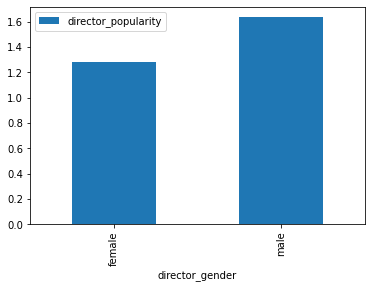

In [172]:
df_tmdb_awards_grouped_allwins.plot.bar();

In [110]:
#3. Checking the Merged director Genders

directors_genders_awards = pd.read_pickle("directors_genders_awards.pkl")
directors_genders_awards.reset_index()

,director_name,Year,director_gender,Winner
0,Adrian Lyne,1987,2,0
1,Akira Kurosawa,1985,2,0
2,Alan J. Pakula,1976,2,0
3,Alan Parker,1978,2,0
4,Alan Parker,1988,2,0
...,...,...,...,...
541,Woody Allen,1989,2,0
542,Woody Allen,1994,2,0
543,Woody Allen,2005,2,0
544,Woody Allen,2011,2,0


In [114]:
# Checking Merge of Genders to Director Awards List
directors_genders_awards["director_gender"].value_counts()


2    538
1      8
Name: director_gender, dtype: int64

In [113]:
# Change Zeros to 2s
directors_genders_awards.loc[directors_genders_awards['director_gender'] == 0]=2


In [115]:
# Show DF

directors_genders_awards

director_gender  Winner
director_name    Year                         
Adrian Lyne      1987                2       0
Akira Kurosawa   1985                2       0
Alan J. Pakula   1976                2       0
Alan Parker      1978                2       0
                 1988                2       0
...                                ...     ...
Woody Allen      1989                2       0
                 1994                2       0
                 2005                2       0
                 2011                2       0
Édouard Molinaro 1979                2       0

[546 rows x 2 columns]

In [116]:
# Replace m and f
directors_genders_awards = directors_genders_awards.assign(director_gender=np.where(directors_genders_awards["director_gender"]==2,"male","female"))
directors_genders_awards

director_gender  Winner
director_name    Year                        
Adrian Lyne      1987            male       0
Akira Kurosawa   1985            male       0
Alan J. Pakula   1976            male       0
Alan Parker      1978            male       0
                 1988            male       0
...                               ...     ...
Woody Allen      1989            male       0
                 1994            male       0
                 2005            male       0
                 2011            male       0
Édouard Molinaro 1979            male       0

[546 rows x 2 columns]

In [117]:
directors_genders_awards.to_pickle("directors_genders_awards.pkl")

In [122]:
# Creating a movie DF with rating threshold

def movie_vote_amount(vote_count):
    df_movies = df_tmdb.loc[df_tmdb["movie_vote_count"] >= vote_count]
    return df_movies

df_movies = movie_vote_amount(20)
df_movies

,director_name,director_gender,director_id,director_popularity,movie_release_date,movie_vote_average,movie_vote_count,movie_original_language,movie_title,movie_id,director_known_for_department,movie_year
0,George Abbott,male,2004,0.6,1957-08-29,6.3,21.0,en,The Pajama Game,40867.0,Directing,1957-01-01
4,Jim Abrahams,male,12936,1.456,1980-07-02,7.3,2453.0,en,Airplane!,813.0,Writing,1980-01-01
5,Jim Abrahams,male,12936,1.456,1988-12-02,7.2,2089.0,en,The Naked Gun: From the Files of Police Squad!,37136.0,Writing,1988-01-01
6,Jim Abrahams,male,12936,1.456,2006-04-12,5.4,1955.0,en,Scary Movie 4,4257.0,Writing,2006-01-01
7,J.J. Abrams,male,15344,3.961,2015-12-15,7.4,14085.0,en,Star Wars: The Force Awakens,140607.0,Directing,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Edward Zwick,male,9181,1.863,2016-10-19,5.7,3097.0,en,Jack Reacher: Never Go Back,343611.0,Directing,2016-01-01
5871,Andrzej Żuławski,male,32082,0.6,1981-05-27,7.4,382.0,fr,Possession,21484.0,Writing,1981-01-01
5872,Andrzej Żuławski,male,32082,0.6,1988-10-09,8.3,46.0,pl,On the Silver Globe,27072.0,Writing,1988-01-01
5873,Andrzej Żuławski,male,32082,0.6,1975-02-12,7.5,43.0,fr,That Most Important Thing: Love,3476.0,Writing,1975-01-01


In [178]:
df_movies_excel = df_movies.groupby(["movie_year","director_gender"]).agg({"movie_vote_average":"mean","director_gender":"count"})
df_movies_excel

movie_vote_average  director_gender
movie_year director_gender                                     
1887-01-01 male                       5.100000                1
1888-01-01 male                       6.400000                2
1896-01-01 female                     5.200000                1
1898-01-01 male                       6.900000                1
1902-01-01 male                       8.000000                1
...                                        ...              ...
2018-01-01 female                     6.120000                5
           male                       6.792308               39
2019-01-01 female                     7.100000                2
           male                       6.792857               14
2020-01-01 male                       6.000000                1

[157 rows x 2 columns]

In [177]:
df_movies_excel.to_csv("df_movies_excel.csv")